In [1]:
# %load_ext autoreload
# %autoreload 2

from ff_energy.utils import pickle_output, read_from_pickle
import pandas as pd
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
from ff_energy.plot import plot_energy_MSE
# plt.style.use(['science','nature','no-latex'])

from ff_energy.structure import atom_key_pairs
from ff_energy.potential import FF, LJ, akp_indx
from ff_energy.ff_fit import LJ_bound
from ff_energy.data import pairs_data
akp_indx

{('CG331', 'CG331'): 0,
 ('CG331', 'HGA3'): 1,
 ('CG331', 'HGP1'): 2,
 ('CG331', 'HT'): 3,
 ('CG331', 'OG311'): 4,
 ('CG331', 'OT'): 5,
 ('HGA3', 'HGA3'): 6,
 ('HGA3', 'HGP1'): 7,
 ('HGA3', 'HT'): 8,
 ('HGA3', 'OG311'): 9,
 ('HGA3', 'OT'): 10,
 ('HGP1', 'HGP1'): 11,
 ('HGP1', 'HT'): 12,
 ('HGP1', 'OG311'): 13,
 ('HGP1', 'OT'): 14,
 ('HT', 'HT'): 15,
 ('HT', 'OG311'): 16,
 ('HT', 'OT'): 17,
 ('OG311', 'OG311'): 18,
 ('OG311', 'OT'): 19,
 ('OT', 'OT'): 20}

In [1]:
2565/3

855.0

In [2]:
pc_pbe0_dz_d4 = next(read_from_pickle("data_pc_pbe0_d4.obj.pkl"))
pc_pbe0_dz = next(read_from_pickle("data_pc_pbe0.obj.pkl"))
pc_hf_dz = next(read_from_pickle("data_pc_hfdz.obj.pkl"))
pc_pbe0tz = next(read_from_pickle("data_pc_pbe0tz.obj.pkl"))


In [3]:
pc_pbe0_dz.data.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE,n,epol_mike
test0,-173.022645,test0,24.14023,-86.50353,20.41138,test0,-1527.133263,test0,20,-1527.276175,190,-89.677734,-77.478222,-958280.703813,-958281.958376,-958370.381547,-66.09215,-66.09215,0,-197.910658
test1,-105.096240,test1,25.25058,-55.44306,8.97296,test1,-1527.135387,test1,20,-1527.221635,189,-54.121080,-53.285800,-958282.036711,-958282.584930,-958336.157791,-46.47010,-46.47010,1,-113.959761
test2,-144.567121,test2,24.75756,-76.78875,14.41942,test2,-1527.140946,test2,20,-1527.260418,190,-74.969007,-70.885989,-958285.524837,-958285.865743,-958360.493844,-62.36933,-62.36933,2,-160.484782
test3,-105.558619,test3,21.75948,-60.46748,5.74741,test3,-1527.151295,test3,20,-1527.247454,190,-60.340318,-58.662892,-958292.019016,-958292.985606,-958352.359334,-54.72007,-54.72007,3,-118.662845
test4,-141.957058,test4,21.69034,-77.22292,12.55821,test4,-1527.150321,test4,20,-1527.270835,190,-75.623009,-73.371184,-958291.407609,-958292.418141,-958367.030618,-64.66471,-64.66471,4,-155.773808


n: 393


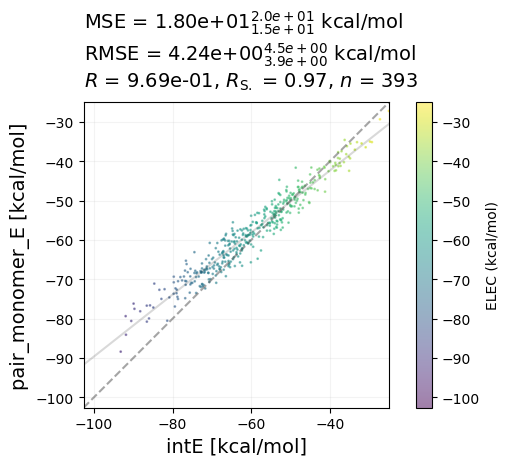

In [4]:
pc_pbe0_dz.plot_pair_monomer_E()

In [5]:
p_d_ = pairs_data(pc_pbe0_dz.pairs_df)

TypeError: 'bool' object is not iterable

In [6]:
p_d_

NameError: name 'p_d_' is not defined

In [7]:
kmdcm_path = "/home/boittier/homeb/water_cluster/pbe0dz_kmdcm/{}/charmm/dcm.xyz"

In [8]:
kmdcm_p_d_ = pairs_data(pc_pbe0_dz.pairs_df, name="kmdcm", dcm_path_=kmdcm_path)

TypeError: 'bool' object is not iterable

In [15]:
kmdcm_p_d_.head()

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair,ECOL_PC,angle_1,angle_2,dih,theta,distance,min_hbond,dcms,ECOL_kmdcm
test467_4_16,-152.718742,-76.359402,-76.358684,-0.000656,test467,"(4, 16)",-0.417853,17.339039,20.503450,-167.920146,132.809173,5.457905,3.836838,"[[[-3.5195, 0.193, -3.9432], [-3.7284, 0.1404,...",-0.384970
test467_2_12,-152.717266,-76.357394,-76.359906,0.000034,test467,"(2, 12)",0.077630,31.291186,28.290189,63.359007,61.070362,6.499726,5.167323,"[[[-0.357, -1.3034, -5.7965], [-0.7411, -1.662...",0.035019
test467_4_5,-152.714677,-76.359402,-76.355286,0.000012,test467,"(4, 5)",0.038944,28.133396,17.516706,48.957649,57.943799,6.735905,5.708780,"[[[-3.5195, 0.193, -3.9432], [-3.7284, 0.1404,...",0.015178
test467_5_16,-152.713801,-76.355286,-76.358684,0.000168,test467,"(5, 16)",0.144882,11.628122,16.364509,-165.931551,124.681660,6.151530,4.888614,"[[[-1.3749, 5.7091, -3.5927], [-1.8948, 5.6584...",0.116138
test467_4_20,-152.714093,-76.359402,-76.354903,0.000213,test467,"(4, 20)",0.180717,34.183827,27.185213,29.313988,-80.603652,7.043256,6.132629,"[[[-3.5195, 0.193, -3.9432], [-3.7284, 0.1404,...",0.141950


In [102]:
mdcm_path = "/home/boittier/homeb/water_cluster/pbe0dz_mdcm/{}/charmm/dcm.xyz"
mdcm_p_d_ = pairs_data(pc_pbe0_dz.pairs_df, name="mdcm", dcm_path_=mdcm_path)

Strcuture,PDB already already exists, loading structure from pickle


In [103]:
mdcm_p_d_.head()

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair,ECOL_mdcm,angle_1,angle_2,dih,theta,distance,min_hbond,dcms
test467_4_16,-152.718742,-76.359402,-76.358684,-0.000656,test467,"(4, 16)",-0.401216,20.543493,21.147674,-165.432512,134.595571,5.476520,3.918574,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ..."
test467_2_12,-152.717266,-76.357394,-76.359906,0.000034,test467,"(2, 12)",0.041706,34.584551,30.397366,41.855443,-64.832330,6.548902,5.274312,"[[[-0.5273, -1.2432, -5.8746], [-0.6951, -1.80..."
test467_4_5,-152.714677,-76.359402,-76.355286,0.000012,test467,"(4, 5)",0.020633,29.438452,19.414733,67.889690,64.944946,6.730906,5.789666,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ..."
test467_5_16,-152.713801,-76.355286,-76.358684,0.000168,test467,"(5, 16)",0.119691,11.770218,16.753828,-71.816828,101.160124,6.067598,4.783095,"[[[-1.4236, 5.5501, -3.6787], [-1.9764, 5.7517..."
test467_4_20,-152.714093,-76.359402,-76.354903,0.000213,test467,"(4, 20)",0.161538,37.555411,29.973602,-77.704118,-113.500312,7.131873,6.299167,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ..."


#  pairs data


In [104]:
ff = FF(mdcm_p_d_, 
        [], 
        LJ, 
        LJ_bound, 
        pc_pbe0tz.structure_key_pairs['test467'], 
        pairs=True,
       elec="ECOL_PC"
       )



In [105]:
ff.atom_type_pairs

[('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]

In [24]:
test = pc_pbe0tz.pairs_df
test

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair
test467_4_20,-152.753907,-76.379425,-76.374699,0.000217,test467,"(4, 20)"
test467_5_13,-152.754182,-76.374969,-76.378879,-0.000334,test467,"(5, 13)"
test467_7_8,-152.752493,-76.377996,-76.375156,0.000659,test467,"(7, 8)"
test467_7_11,-152.755901,-76.377996,-76.377815,-0.000090,test467,"(7, 11)"
test467_2_16,-152.756188,-76.377125,-76.378947,-0.000116,test467,"(2, 16)"
...,...,...,...,...,...,...
test66_1_18,-152.757224,-76.378513,-76.379381,0.000669,test66,"(1, 18)"
test66_6_12,-152.753140,-76.375769,-76.376892,-0.000479,test66,"(6, 12)"
test66_11_16,-152.756776,-76.377345,-76.378652,-0.000779,test66,"(11, 16)"
test66_12_18,-152.756440,-76.376892,-76.379381,-0.000168,test66,"(12, 18)"


In [25]:
for key in pc_pbe0tz.structure_key_pairs.keys():
    pc_pbe0tz.structure_key_pairs[key].set_2body()

In [26]:
pairs_key_pairs = {}

for iindex in test.index:
    key, a, b = iindex.split("_")
    a, b = int(a), int(b)
    # print(key, a, b)
    pairs_key_pairs[iindex] = [0]*21
    for i, akp in enumerate(ff.atom_type_pairs):
        k = akp_indx[akp]
        dists= pc_pbe0tz.structure_key_pairs[key].distances_pairs[k][(a,b)]
        pairs_key_pairs[iindex][k] = dists



In [28]:
# pairs_key_pairs.keys()
ff.dists = pairs_key_pairs

In [29]:
pkpl = list(pairs_key_pairs.keys())
ff.data = ff.data.query("index in @pkpl").copy()

In [5]:
fit = ff.LJ_performace(ff.eval_func([1.34, 1.04, 0.01, 0.15]))
# fit = ff.LJ_performace(ff.eval_func([2.49, 0.85, 0.0001, 0.0001]))
# fit = ff.LJ_performace(ff.eval_func([1.63, 0.25, 0.25, 0.38]))
# fit = ff.LJ_performace(ff.eval_func([0.25, 1.8, 0.5, 0.06]))
# fit = ff.LJ_performace(ff.eval_func([1.8, 0.25, 0.06, 0.5, ]))

In [34]:
# fit.groupby("key").sum()

/tmp/ipykernel_718848/3961709191.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_energy_MSE(fit.groupby("key").sum(),


(<Axes: xlabel='Pair int. $E$ [kcal/mol]', ylabel='LJ int. $E$ [kcal/mol]'>,
 {'MSE': 88.32954164284271,
  'RMSE': 9.39837973497787,
  'R': 0.8932046720528768,
  'RS': 0.8764516338065352,
  'n': 500})

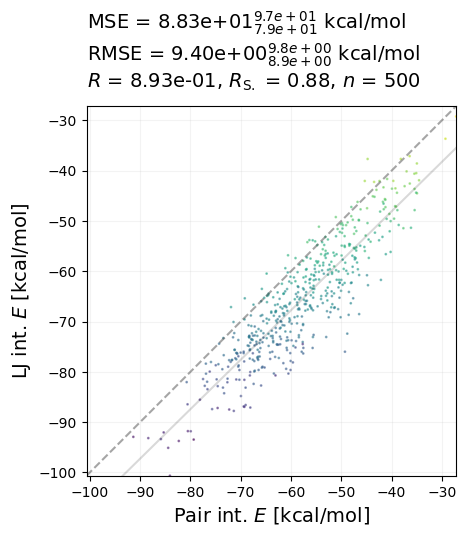

In [6]:
plot_energy_MSE(fit.groupby("key").sum(), 
                "intE", 
                "nb_intE", 
                elec='ECOL_PC', 
                bootstrap=True,
                xlabel="Pair int. $E$ [kcal/mol]",
                ylabel="LJ int. $E$ [kcal/mol]"
               )

In [7]:
fit.describe()

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,ECOL_PC,angle_1,angle_2,dih,theta,distance,min_hbond,ECOL_kmdcm,ECOL_mdcm,intE,LJ,nb_intE,SE,min_hbond_bin
count,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000,9.474800e+04,94748.000000
mean,-152.715118,-76.357327,-76.357304,-0.000488,-0.356586,32.864209,32.433340,0.709512,-2.337249,6.143202,5.540133,-0.410780,-0.542754,-0.305922,0.009554,-0.347032,1.918052e-01,5.592018
std,0.003147,0.001928,0.001943,0.001567,1.272407,22.832362,23.403109,104.332017,97.824362,2.084912,2.087797,1.459773,1.936710,0.983583,0.252317,1.150750,1.028693e+00,2.088201
min,-152.726605,-76.359913,-76.359913,-0.009118,-8.567905,0.115795,0.096965,-179.998745,-179.408772,2.194879,1.497232,-11.489025,-13.041074,-5.721861,-0.679545,-6.464610,2.183033e-14,1.600998
25%,-152.717140,-76.358751,-76.358747,-0.000489,-0.266552,17.493197,16.690183,-89.606548,-92.672057,4.540304,3.959041,-0.262787,-0.405715,-0.306913,-0.014801,-0.280162,9.267923e-05,3.987608
50%,-152.715385,-76.357755,-76.357756,-0.000078,-0.040983,27.404365,26.593831,0.901164,-4.038668,6.022756,5.428817,-0.039893,-0.062380,-0.048992,-0.002829,-0.044943,8.079840e-04,5.440327
75%,-152.713301,-76.356374,-76.356322,0.000126,0.097761,41.736956,41.321023,91.479170,86.592379,7.702627,7.100166,0.090680,0.148800,0.079374,-0.000649,0.092084,1.144495e-02,7.100577
max,-152.696128,-76.342729,-76.342729,0.008595,3.711994,177.016973,178.118010,179.998427,179.238418,12.116046,11.873797,4.429839,5.649968,5.393395,9.575535,8.402209,3.774405e+01,11.873797


In [109]:
import numpy as np

ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))

key = "min_hbond"
key_min = fit[key].min()
key_max = fit[key].max()
key_range = key_max - key_min
NBINS = 100
bins = np.arange(key_min, key_max, key_range/NBINS)
fit[f"{key}_bin"] = (
    np.digitize(fit[key], bins=bins) 
) 
fit[f"{key}_bin"] = key_min + fit[f"{key}_bin"] * key_range/NBINS 
EB = ("sd", 3)


def intEvsR(fit, ax):
    sns.lineplot(x="min_hbond_bin", y="nb_intE", data=fit, 
                 errorbar=EB,
                 color="purple",
                 ax=ax,
                 label="$E_{pairs(Model)}$"
                )
    sns.lineplot(x="min_hbond_bin", y="intE", data=fit, 
                 errorbar=EB,
                 color="black",
                 ax=ax,
                 label="$E_{pairs(DFT)}$"
                )
    ax.axhline(0, c="k", linewidth=0.5)
    ax.set_xlim(1.5,5)
    ax.set_xlabel("$r$ [$\mathrm{\\AA}$]")
    ax.set_ylim(-10,10)
    ax.grid(alpha=0.5)
    return ax


In [110]:
def EvsR(fit, ax, ecol="ECOL_kmdcm"):
    sns.lineplot(x="min_hbond_bin", y=ecol, data=fit, 
                 errorbar=EB,
                 color="orange",
                 ax=ax,
                 label="$E_{ELEC}$"
                )
    sns.lineplot(x="min_hbond_bin", y="LJ", data=fit, 
                 errorbar=EB,
                 color="green",
                 ax=ax,
                 label="$E_{LJ}$"
                )
    ax.axhline(0, c="k", linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.set_xlim(1.5,5)
    ax.set_xlabel("$r$ [$\mathrm{\\AA}$]")
    ax.set_ylim(-10,10)
    return ax

In [111]:
def plot_dists(fit, ax):
    # fit = fit.dropna()
    fit = fit.query("-10 < nb_intE < 10")
    ax.hist(fit["intE"], color="k", alpha=0.3, label="$E_{pairs(DFT)}$")
    ax.hist(fit["nb_intE"], color="gold", alpha=0.3, label="$E_{pairs(Model)}$")
    ax.set_xlabel("$E$ [kcal/mol]")
    ax.legend()
    ax.set_xlim(-10,10)
    return ax

In [112]:
from ff_energy.plot import plot_energy_MSE
def cor_pairs(fit, ax):
    ax, stats = plot_energy_MSE(fit.groupby("key").sum(), 
                "intE", 
                "nb_intE", 
                elec='ECOL_PC', 
                bootstrap=True,
                xlabel="$E_{DFT}$ [kcal/mol]",
                ylabel="$E_{Model}$ [kcal/mol]",
                ax=ax,
                title=False,
                    FONTSIZE=10,
                bounds=(-100,-20)
               )
    return ax, stats


def cor_pairs_cluster(fit, ax):
    ax, stats = plot_energy_MSE(fit, 
                "intE", 
                "P_intE", 
                elec='ECOL', 
                bootstrap=True,
                xlabel="$E_{Clusters}$ [kcal/mol]",
                ylabel="$E_{Pairs}$ [kcal/mol]",
                ax=ax,
                title=False,
                FONTSIZE=10,
                                bounds=(-100,-20)
               )
    return ax, stats

def cor_cluster(fit, ax):
    ax, stats = plot_energy_MSE(fit, 
                "intE", 
                "nb_intE", 
                elec='ECOL', 
                bootstrap=True,
                xlabel="$E_{DFT}$ [kcal/mol]",
                ylabel="$E_{Model}$ [kcal/mol]",
                ax=ax,
                title=False,
                FONTSIZE=10,
                                bounds=(-100,-20)
               )
    return ax, stats

In [113]:
def plot_data(ff_pairs, ff_fit, ecol="ECOL_PC", EB=("sd", 3), suptitle=None):
    """
    Bin by min_hbond distance
    """
    key = "min_hbond"
    key_min = ff_pairs.data[key].min()
    key_max = ff_pairs.data[key].max()
    key_range = key_max - key_min
    NBINS = 100
    bins = np.arange(key_min, key_max, key_range/NBINS)
    ff_pairs.data[f"{key}_bin"] = (
        np.digitize(ff_pairs.data[key], bins=bins) 
    ) 
    ff_pairs.data[f"{key}_bin"] = key_min + ff_pairs.data[f"{key}_bin"] * key_range/NBINS 
    ff_pairs.elec = ecol

    """
    Ignore ELEC calculations with > 1 kcal/mol error
    """
    MSE = ((ff_pairs.data.groupby("key")[ecol].sum() - ff_fit.data.sort_index()["ELEC"])**2).mean()
    RMSE = np.sqrt(MSE)
    print(MSE, RMSE)
    _ = pd.DataFrame({"true": ff_pairs.data.groupby("key")[ecol].sum(), 
                      "test": ff_fit.data.sort_index()["ELEC"]} )
    _["error"] = (_["true"] - _["test"]).abs()
    error_keys = list(_[_["error"] > 1].index)
    
    ff_fit.data = ff_fit.data.query("index not in @error_keys").copy()


    Nopts = len(ff_fit.opt_results)
    iis = [i for i in range(Nopts) if ff_fit.opt_results[i]["fun"] < 40]
    for i in [0]:
        print(ff_fit.opt_results[i]["fun"])
        """ Eval 2 body interactions
        """
        parms = ff_fit.opt_results[i]["x"]
        fit = ff_pairs.LJ_performace(ff.eval_func(parms))  
        fit = fit.query("key not in @error_keys").copy()
        """ Eval many body interactions
        """
        _ = ff_fit.LJ_performace(ff_fit.eval_func(parms))
        _ = _.query("index not in @error_keys").copy()

        """Plot
        """
        fig, axs = plt.subplot_mosaic([['a)', 'b)'], ['c)', 'd)'], ['e)', 'f)']],
                                      layout='constrained', figsize=(8,8))

        titles = {'a)': "Pairs(model): $E_{LJ}(r)$, $E_{ELEC}(r)$",
                  'b)': "Pairs: $E_{DFT}(r)$ $E_{model}(r)$",
                  'c)': "$E_{pairs}$ Distribution",
                  'd)': "DFT: Many-body Error",
                  'e)': "Pairs: Two-body Error (Test)",
                  'f)': "Clusters: Many-body Error (Train)",
                 }
        # plot labels
        for label, ax in axs.items():
            ax.set_title(label + " " + titles[label])
        #  elec and LJ
        EvsR(fit, axs["a)"], ecol=ecol)
        #  intE fit vs data
        intEvsR(fit, axs["b)"]) 
        # distributions
        plot_dists(fit, axs["c)"])
        # pair correl
        QQQ, spp = cor_pairs(fit, axs["e)"])
        # pair/cluster correl
        QQQ, spc = cor_pairs_cluster(_, axs["d)"])
        # clusters correl
        QQQ, scc = cor_cluster(_, axs["f)"])

        #  plot statistics
        axes = [axs["e)"], axs["d)"], axs["f)"]]
        stats = [spp, spc, scc]
        for ax_, s, in zip(axes, stats):
            ax_.text(1.,.6,
                     "RMSE: {:.1f}\nR: {:.2f}\nRs: ${:.2f}$".format(
                         s["RMSE"], 
                         s["R"],
                         s["RS"]
                     ), 
                    transform=ax_.transAxes,
                    ma="center",
                    fontsize=15
                          )
        # title
        plt.suptitle(ff_fit.name, fontsize=20)
        if suptitle is not None:
            pt = " ".join(["{:.3f}".format(x) for x in parms])
            plt.suptitle(suptitle+f"_{pt}", fontsize=20)
        plt.show()
    
    

#  pickle pairs ff

In [298]:
pickle_output(ff, "ff_pc_pairs")

In [143]:
# ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))

1.5990096878517222 1.2645195482283862
30.6613586207218


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


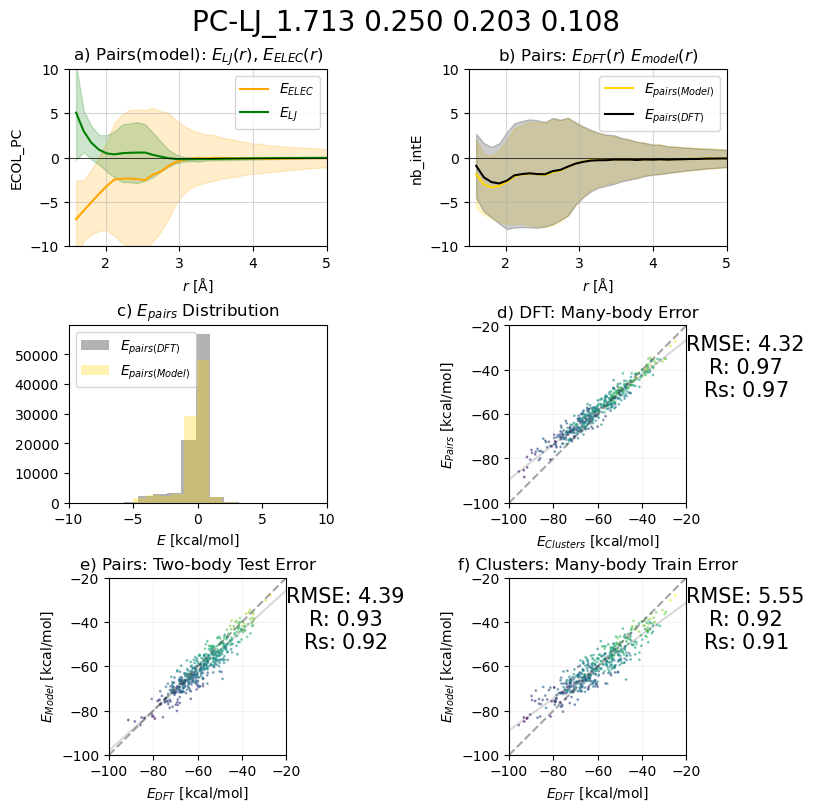

30.661358589193814


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


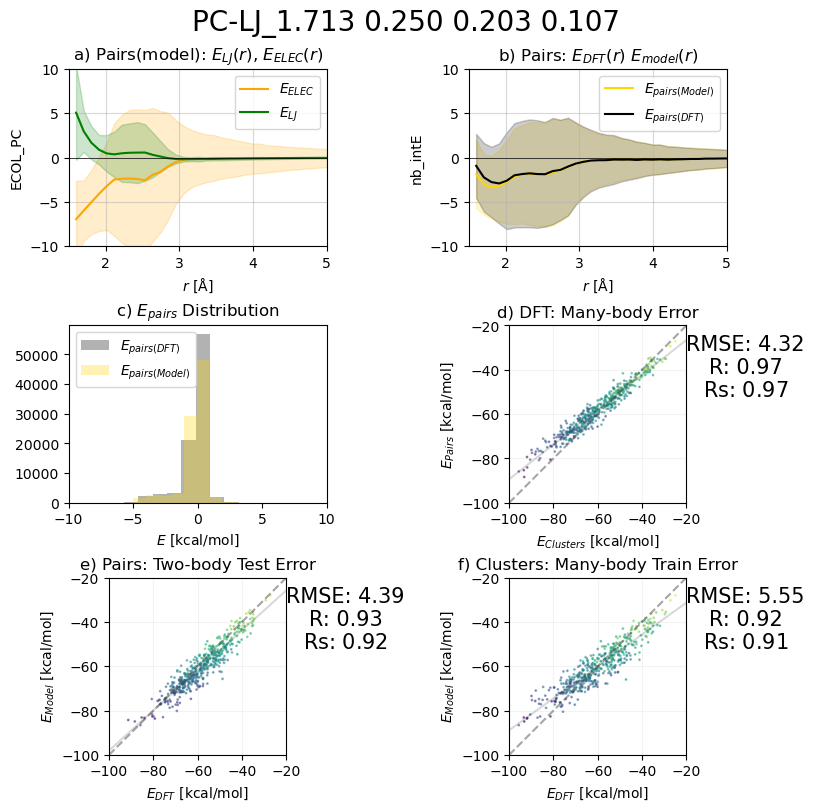

35.14200454065623


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


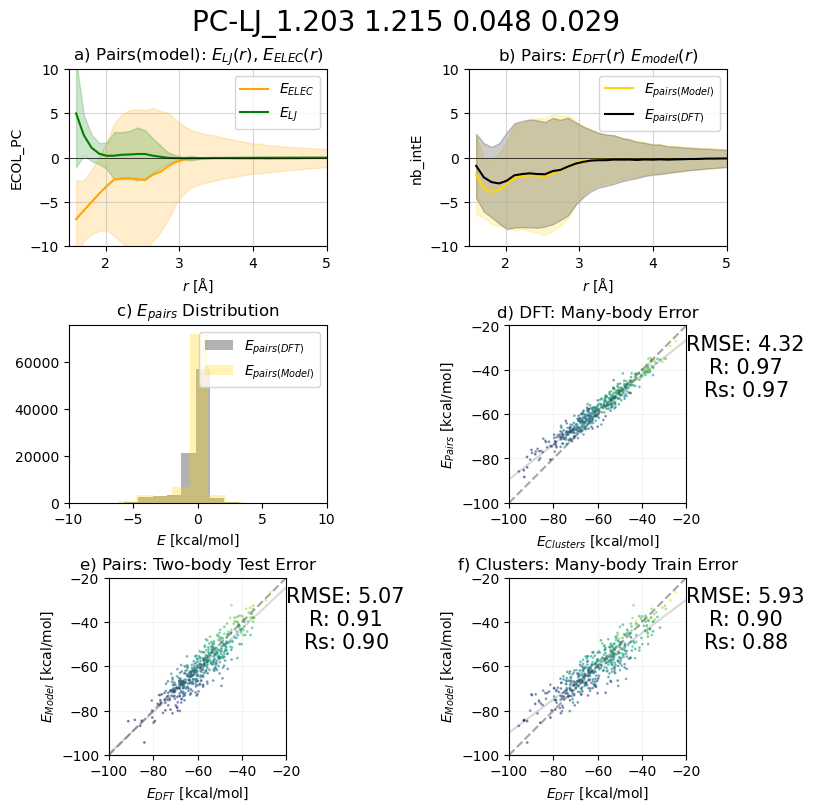

30.661358589007705


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


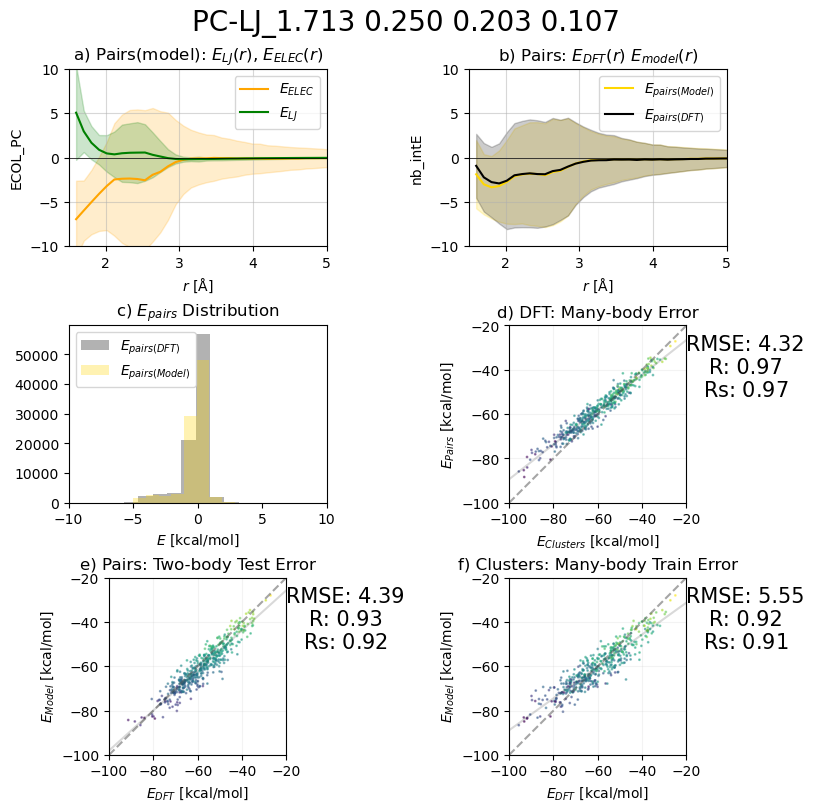

30.66135858900608


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


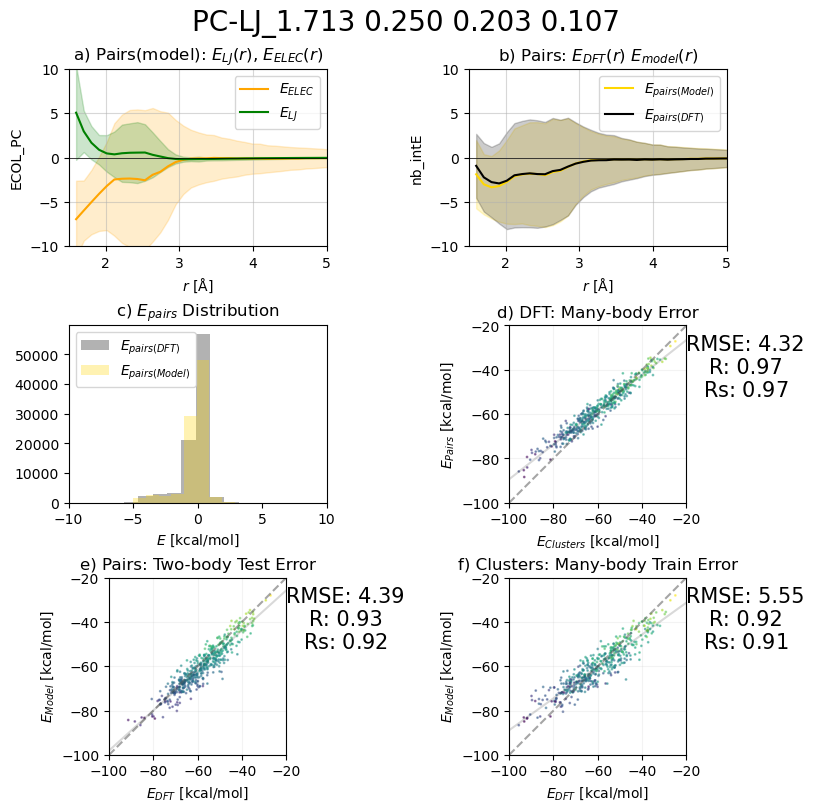

31.108246314631337


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


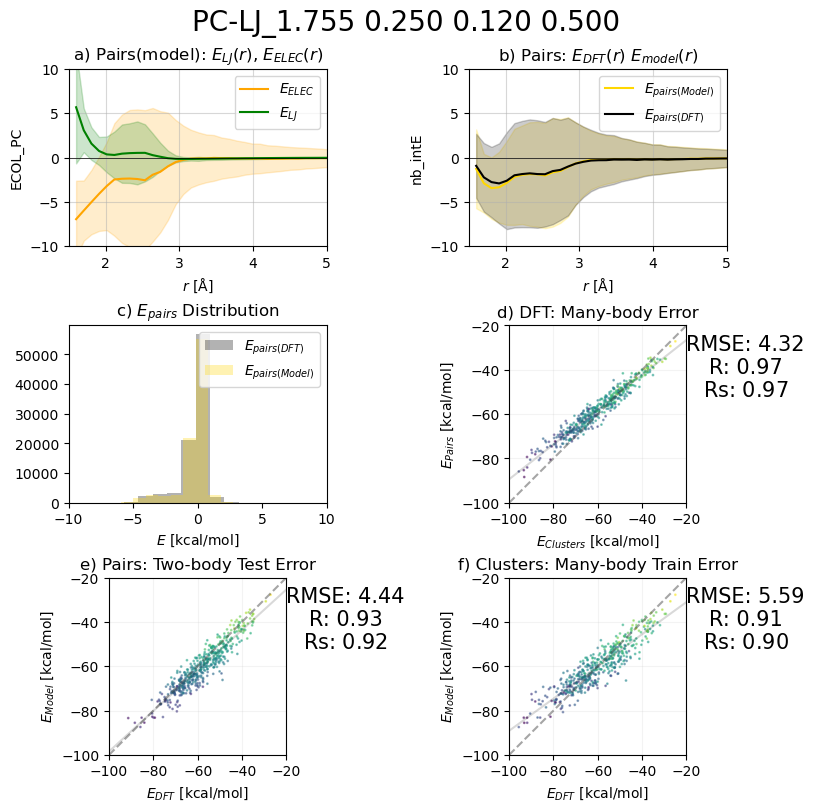

31.108246314610135


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


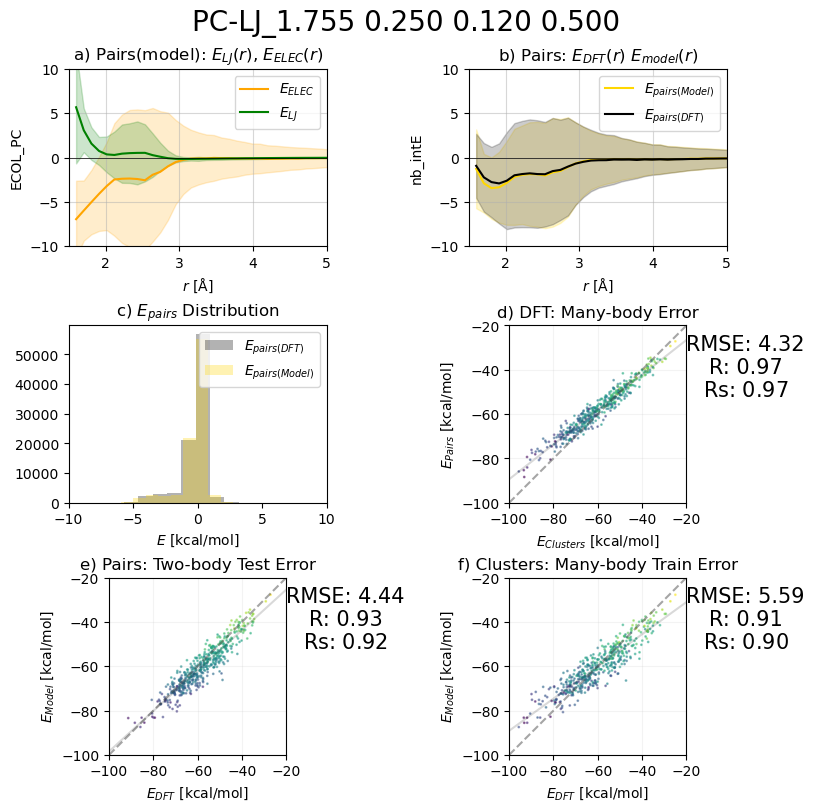

30.661358589027355


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


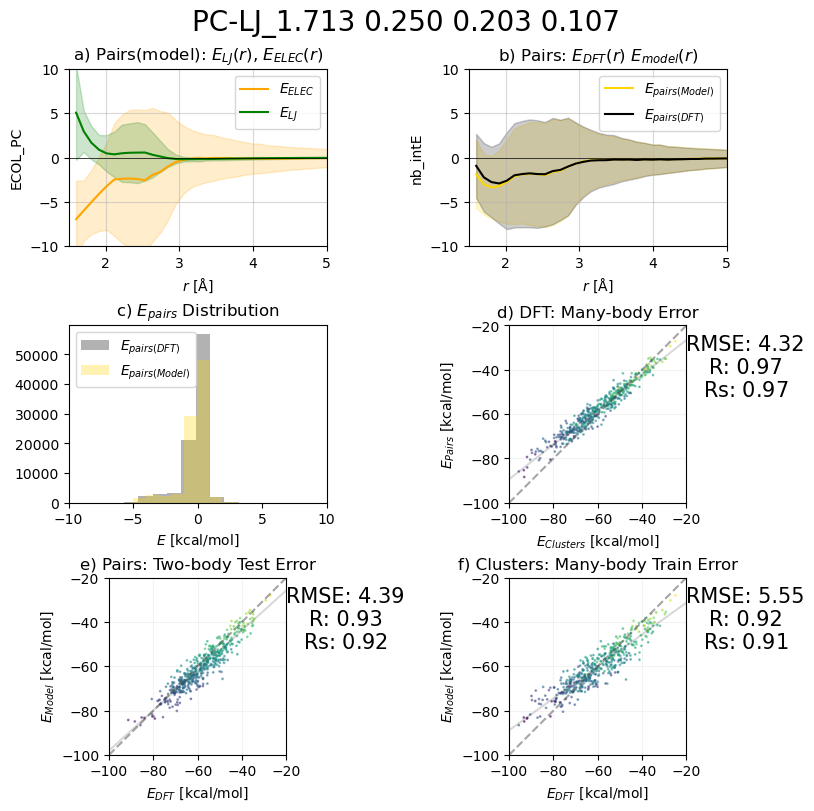

In [314]:
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))
ff_fit = next(read_from_pickle('pickles/pbe0_dz_pc_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
plot_data(ff, ff_fit, ecol="ECOL_PC", EB=("sd", 1), suptitle="PC-LJ")

2.3182941512369415 1.5225945459106773
16.089242074318324


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


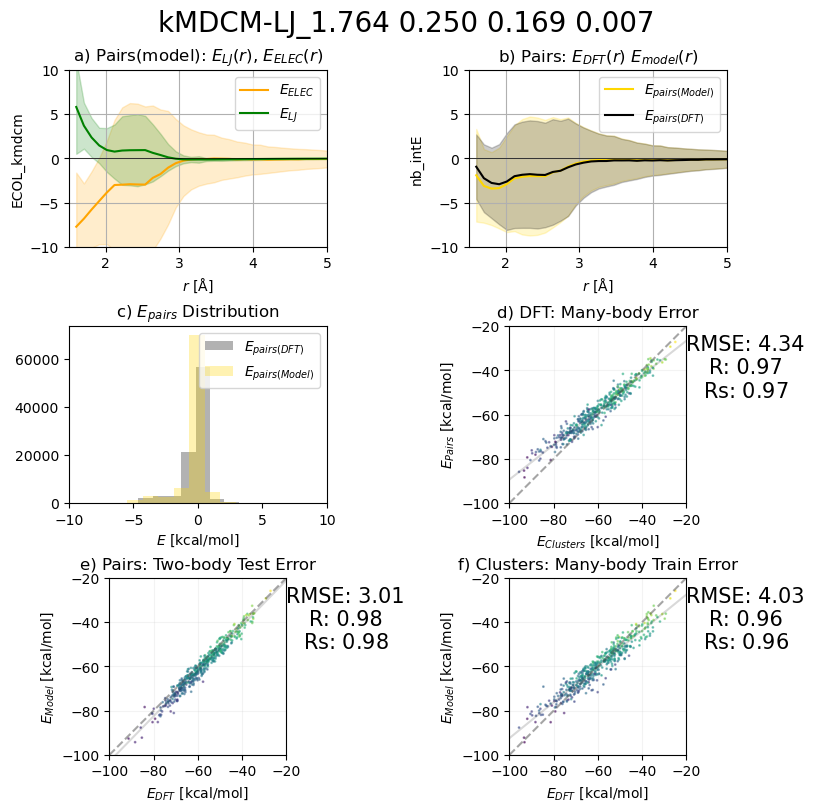

16.08919484402843


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


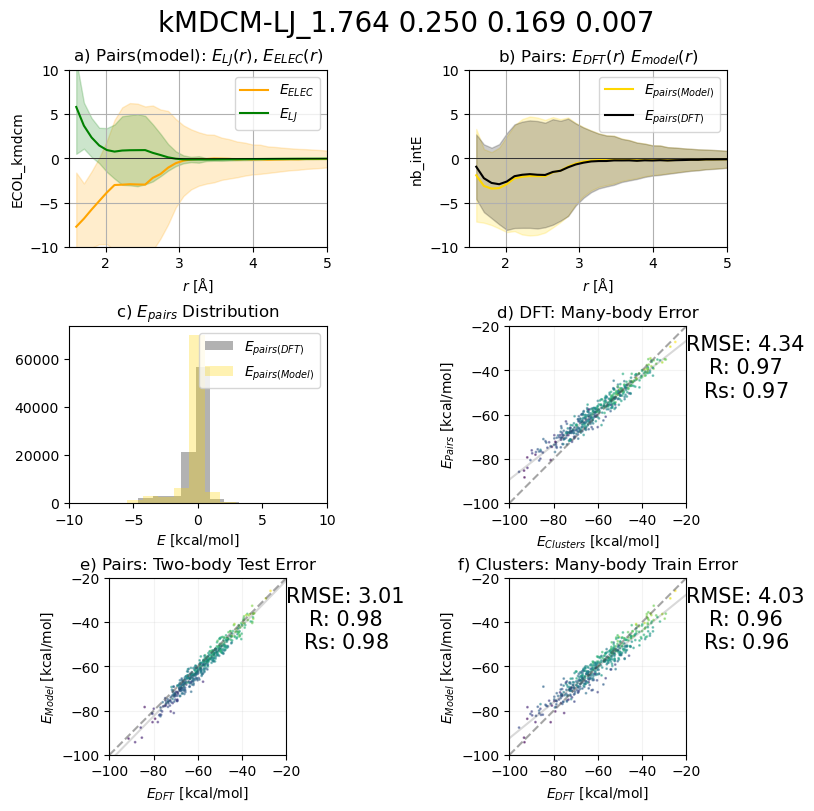

21.36851196070638


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


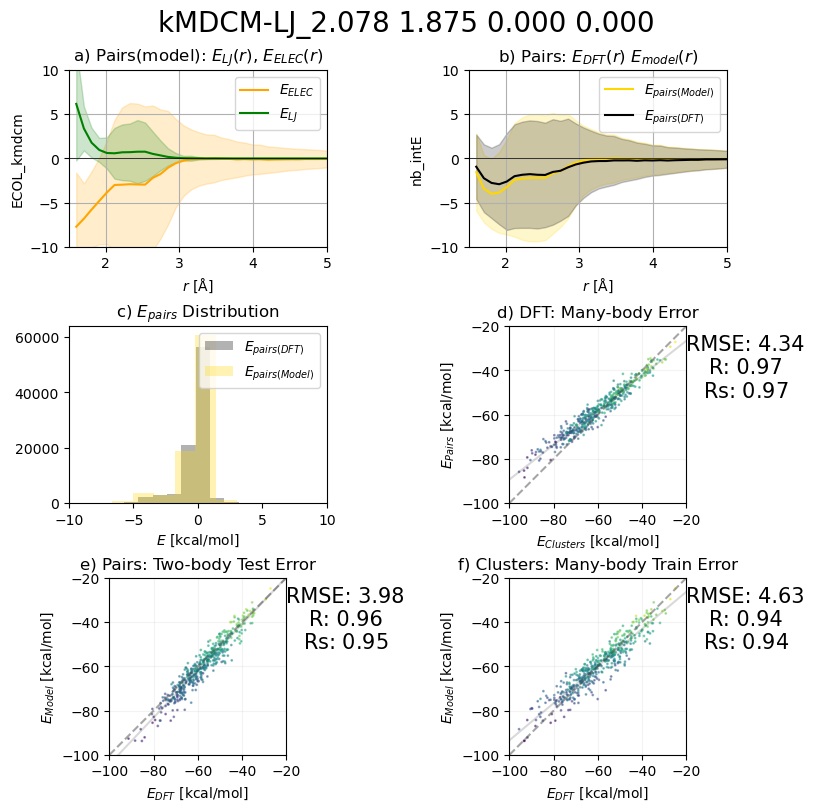

17.98212757005373


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


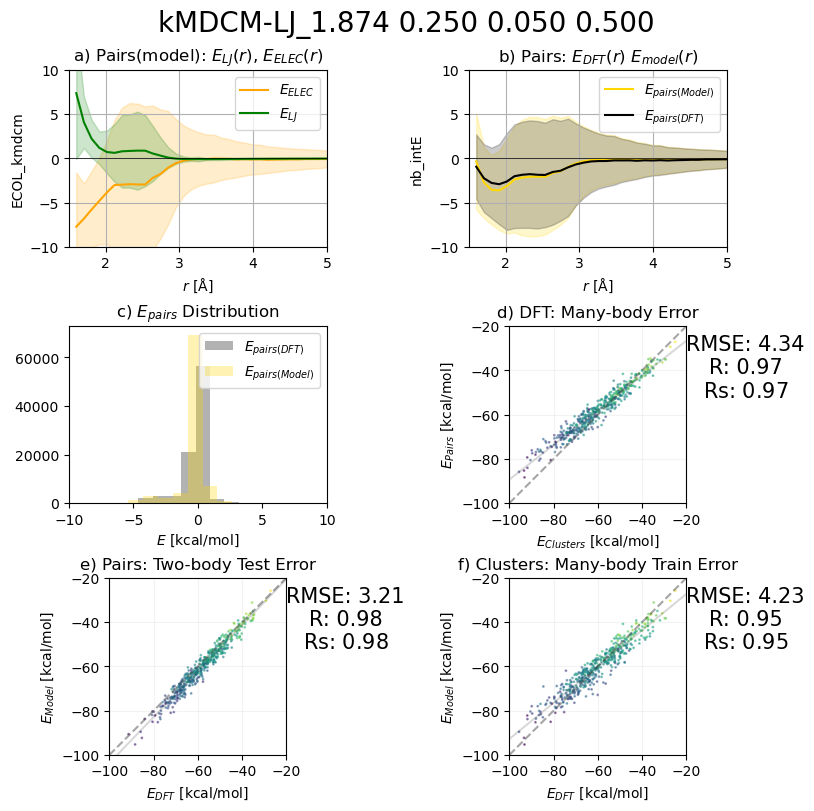

16.09784097420061


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


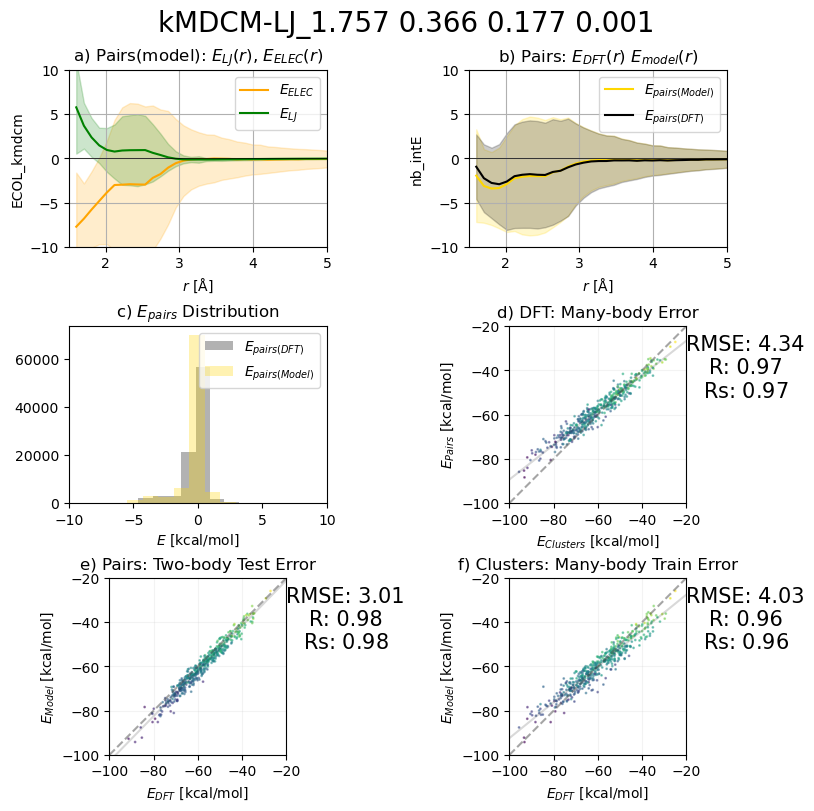

17.982127570089833


/tmp/ipykernel_709773/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


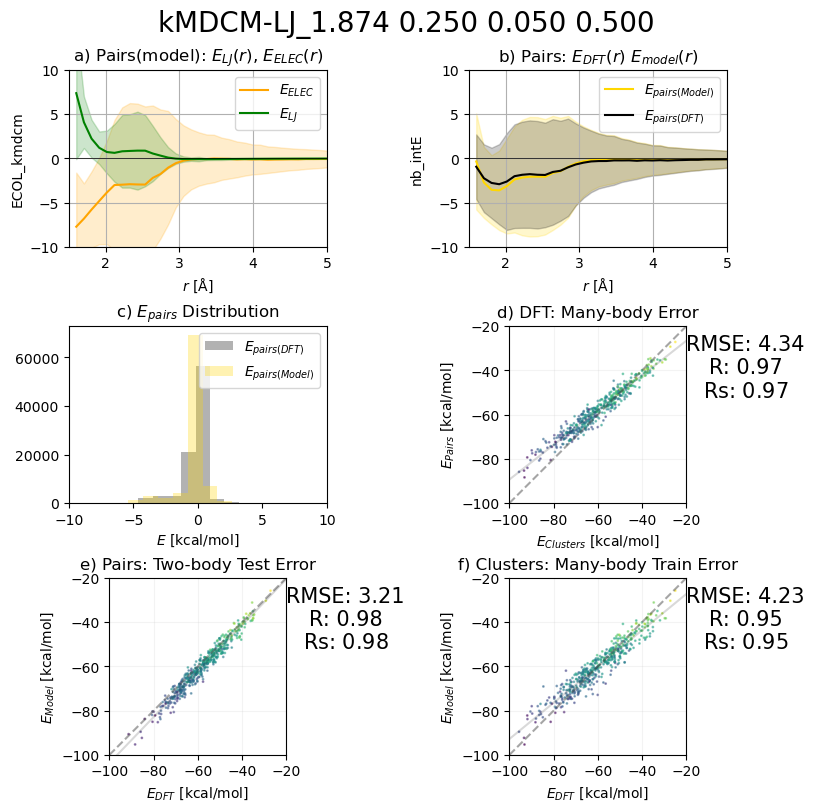

In [310]:
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))
ff_fit_kmdcm = next(read_from_pickle('pickles/pbe0_dz_kmdcm_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
plot_data(ff, ff_fit_kmdcm, ecol="ECOL_kmdcm",EB=("sd", 1), suptitle="kMDCM-LJ")

ELEC ECOL_PC
3.7124768048326486 1.9267788676526034
25.651959988843863


/tmp/ipykernel_718848/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


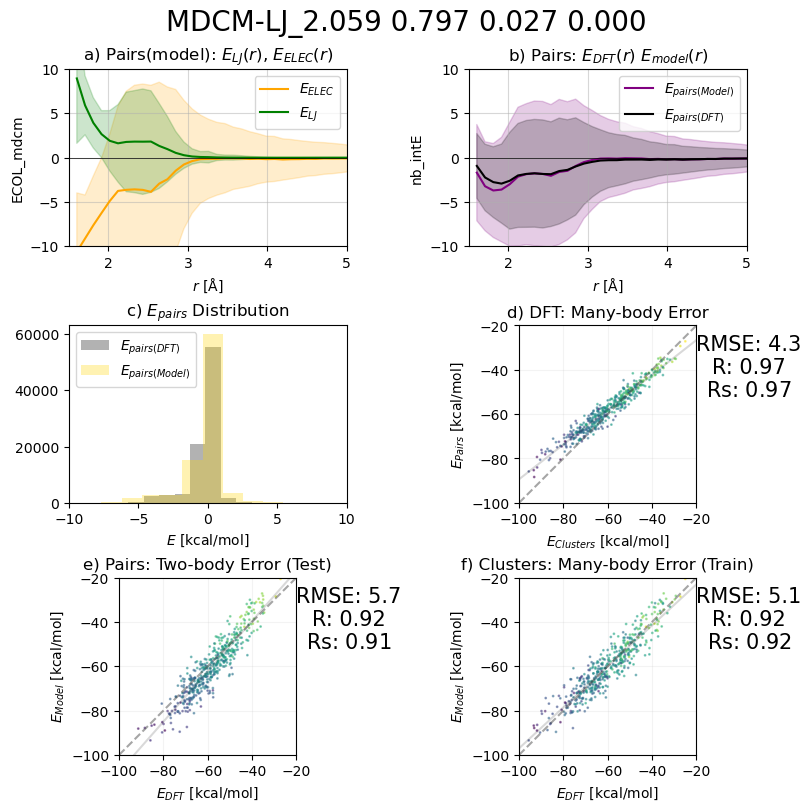

In [67]:
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))
ff_fit_mdcm = next(read_from_pickle('pickles/pbe0_dz_mdcm_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
print(ff_fit_mdcm.elec, ff.elec)
plot_data(ff, ff_fit_mdcm, ecol="ECOL_mdcm",EB=("sd", 1), suptitle="MDCM-LJ")

In [15]:
ff.ecol = "ECOL_PC"
ff.fit_func(ff_fit_mdcm.opt_results[0]["x"], maxfev=10)

Optimizing LJ parameters...
function: LJ
bounds: ((0.25, 2.5), (0.25, 2.5), (0.0001, 0.5), (0.0001, 0.5))
maxfev: 10
initial guess: [2.05854460e+00 7.97067886e-01 2.70955272e-02 1.00000000e-04]
final_loss_fn:  0.19359206332557427
       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 0.19359206332557427
             x: [ 2.084e+00  8.045e-01  2.735e-02  1.009e-04]
           nit: 4
          nfev: 10
 final_simplex: (array([[ 2.084e+00,  8.045e-01,  2.735e-02,  1.009e-04],
                       [ 2.071e+00,  8.207e-01,  2.790e-02,  1.030e-04],
                       ...,
                       [ 2.059e+00,  8.369e-01,  2.710e-02,  1.000e-04],
                       [ 2.059e+00,  7.971e-01,  2.710e-02,  1.050e-04]]), array([ 1.936e-01,  1.949e-01,  2.072e-01,  2.122e-01,
                        2.184e-01]))
Set optimized parameters to FF object, self.df["LJ"] is updated.


       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 0.19359206332557427
             x: [ 2.084e+00  8.045e-01  2.735e-02  1.009e-04]
           nit: 4
          nfev: 10
 final_simplex: (array([[ 2.084e+00,  8.045e-01,  2.735e-02,  1.009e-04],
                       [ 2.071e+00,  8.207e-01,  2.790e-02,  1.030e-04],
                       ...,
                       [ 2.059e+00,  8.369e-01,  2.710e-02,  1.000e-04],
                       [ 2.059e+00,  7.971e-01,  2.710e-02,  1.050e-04]]), array([ 1.936e-01,  1.949e-01,  2.072e-01,  2.122e-01,
                        2.184e-01]))

In [114]:
def plot_data_pairs_fit(ff_pairs, ff_fit, ecol="ECOL_PC", EB=("sd", 3), suptitle=None, ERRORCUT=1):
    """
    Bin by min_hbond distance
    """
    key = "min_hbond"
    key_min = ff_pairs.data[key].min()
    key_max = ff_pairs.data[key].max()
    key_range = key_max - key_min
    NBINS = 100
    bins = np.arange(key_min, key_max, key_range/NBINS)
    ff_pairs.data[f"{key}_bin"] = (
        np.digitize(ff_pairs.data[key], bins=bins) 
    ) 
    ff_pairs.data[f"{key}_bin"] = key_min + ff_pairs.data[f"{key}_bin"] * key_range/NBINS 
    ff_pairs.elec = ecol

    """
    Ignore ELEC calculations with > 1 kcal/mol error
    """
    MSE = ((ff_pairs.data.groupby("key")[ecol].sum() - ff_fit.data.sort_index()["ELEC"])**2).mean()
    RMSE = np.sqrt(MSE)
    # print(ff_pairs.data.groupby("key")[ecol].sum())
    # print(ff_fit.data.sort_index()["ELEC"])
    print(MSE, RMSE)
    _ = pd.DataFrame({"true": ff_pairs.data.groupby("key")[ecol].sum(), 
                      "test": ff_fit.data.sort_index()["ELEC"]} )
    _["error"] = (_["true"] - _["test"]).abs()
    print(_.head())
    error_keys = list(_[_["error"] > ERRORCUT].index)

    ff_fit.data = ff_fit.data.query("index not in @error_keys").copy()
    print(ff_pairs.data)
    ff_pairs.data = ff_pairs.data.query("key not in @error_keys").copy()
    print(ff_pairs.data)

    Nopts = len(ff_pairs.opt_results)
    iis = [i for i in range(Nopts)]
    for i in iis:
        print(ff_pairs.opt_results[i]["fun"])
        """ Eval 2 body interactions
        """
        parms = ff_pairs.opt_results[i]["x"]
        fit = ff_pairs.LJ_performace(ff_pairs.eval_func(parms))  
        
        # print(fit)
        """ Eval many body interactions
        """
        # print(ff_fit.data)
        ff_fit.data = ff_fit.data.query("index not in @error_keys").copy()
        # print(ff_fit.data)
        _ = ff_fit.LJ_performace(ff_fit.eval_func(parms))
        _["nb_intE"] = fit.groupby("key").sum()["nb_intE"]
        """Plot
        """
        fig, axs = plt.subplot_mosaic([['a)', 'b)'], ['c)', 'd)'], ['e)', 'f)']],
                                      layout='constrained', figsize=(8,8))

        titles = {'a)': "Pairs(model): $E_{LJ}(r)$, $E_{ELEC}(r)$",
                  'b)': "Pairs: $E_{DFT}(r)$ $E_{model}(r)$",
                  'c)': "$E_{pairs}$ Distribution",
                  'd)': "DFT: Many-body Error",
                  'e)': "Pairs: Two-body Error (Test)",
                  'f)': "Clusters: Many-body Error (Train)",
                 }
        # plot labels
        for label, ax in axs.items():
            ax.set_title(label + " " + titles[label])
        #  elec and LJ
        EvsR(fit, axs["a)"], ecol=ecol)
        #  intE fit vs data
        intEvsR(fit, axs["b)"]) 
        # distributions
        plot_dists(fit, axs["c)"])
        # pair correl
        QQQ, spp = cor_pairs(fit, axs["e)"])
        # pair/cluster correl
        QQQ, spc = cor_pairs_cluster(_, axs["d)"])
        # clusters correl
        QQQ, scc = cor_cluster(_, axs["f)"])

        #  plot statistics
        axes = [axs["e)"], axs["d)"], axs["f)"]]
        stats = [spp, spc, scc]
        for ax_, s, in zip(axes, stats):
            ax_.text(1.,.6,
                     "RMSE: {:.1f}\nR: {:.2f}\nRs: ${:.2f}$".format(
                         s["RMSE"], 
                         s["R"],
                         s["RS"]
                     ), 
                    transform=ax_.transAxes,
                    ma="center",
                    fontsize=15
                          )
        # title
        plt.suptitle(ff_fit.name, fontsize=20)
        if suptitle is not None:
            pt = " ".join(["{:.3f}".format(x) for x in parms])
            plt.suptitle(suptitle+f"_{pt}", fontsize=20)
        plt.show()

#  MDCM

Optimizing LJ parameters...
function: LJ
bounds: ((0.25, 2.5), (0.25, 2.5), (0.0001, 0.5), (0.0001, 0.5))
maxfev: 1000
initial guess: [1.69873425e+00 2.50000000e-01 5.00000000e-01 1.00000000e-04]
final_loss_fn:  0.03639782564378806
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.03639782564378806
             x: [ 1.684e+00  2.500e-01  5.000e-01  1.000e-04]
           nit: 196
          nfev: 327
 final_simplex: (array([[ 1.684e+00,  2.500e-01,  5.000e-01,  1.000e-04],
                       [ 1.684e+00,  2.500e-01,  5.000e-01,  1.000e-04],
                       ...,
                       [ 1.684e+00,  2.500e-01,  5.000e-01,  1.000e-04],
                       [ 1.684e+00,  2.500e-01,  5.000e-01,  1.000e-04]]), array([ 3.640e-02,  3.640e-02,  3.640e-02,  3.640e-02,
                        3.640e-02]))
Set optimized parameters to FF object, self.df["LJ"] is updated.
ELEC ECOL_mdcm
2.410696410024926 1.5526417519907567
     

/tmp/ipykernel_718848/1067471653.py:52: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _["nb_intE"] = fit.groupby("key").sum()["nb_intE"]
/tmp/ipykernel_718848/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


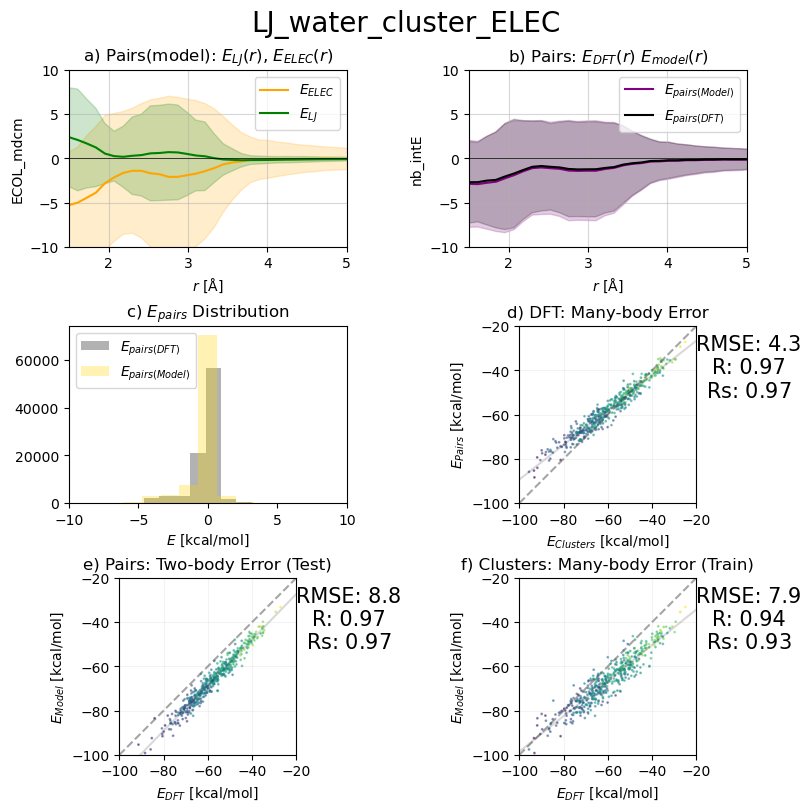

In [115]:
ff_fit_mdcm = next(read_from_pickle('pickles/pbe0_dz_mdcm_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))
ff.elec = "ECOL_mdcm"
ff.fit_func(ff_fit_mdcm.opt_results[0]["x"], maxfev=1000)
print(ff_fit_mdcm.elec, ff.elec)

plot_data_pairs_fit(ff, ff_fit_mdcm, ERRORCUT=1, ecol="ECOL_mdcm")

In [118]:
ff.data

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair,ECOL_PC,angle_1,angle_2,dih,...,distance,min_hbond,dcms,ECOL_kmdcm,ECOL_mdcm,intE,LJ,nb_intE,SE,min_hbond_bin
test467_4_16,-152.718742,-76.359402,-76.358684,-0.000656,test467,"(4, 16)",-0.417853,20.543493,21.147674,-165.432512,...,5.476520,3.918574,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ...",-0.384970,-0.401216,-0.411849,-0.031101,-0.416072,1.782920e-05,4.016254
test467_2_12,-152.717266,-76.357394,-76.359906,0.000034,test467,"(2, 12)",0.077630,34.584551,30.397366,41.855443,...,6.548902,5.274312,"[[[-0.5273, -1.2432, -5.8746], [-0.6951, -1.80...",0.035019,0.041706,0.021442,-0.014966,0.020052,1.930546e-06,5.275370
test467_4_5,-152.714677,-76.359402,-76.355286,0.000012,test467,"(4, 5)",0.038944,29.438452,19.414733,67.889690,...,6.730906,5.789666,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ...",0.015178,0.020633,0.007486,-0.008528,0.006650,6.991203e-07,5.847695
test467_5_16,-152.713801,-76.355286,-76.358684,0.000168,test467,"(5, 16)",0.144882,11.770218,16.753828,-71.816828,...,6.067598,4.783095,"[[[-1.4236, 5.5501, -3.6787], [-1.9764, 5.7517...",0.116138,0.119691,0.105533,-0.008918,0.107220,2.844110e-06,4.817510
test467_4_20,-152.714093,-76.359402,-76.354903,0.000213,test467,"(4, 20)",0.180717,37.555411,29.973602,-77.704118,...,7.131873,6.299167,"[[[-3.683, 0.2307, -3.9735], [-3.6289, 0.091, ...",0.141950,0.161538,0.133344,-0.012199,0.129751,1.291050e-05,6.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test66_3_5,-152.705818,-76.352102,-76.354001,0.000286,test66,"(3, 5)",0.181986,10.610797,19.804722,-173.039945,...,6.186897,4.768948,"[[[-2.5751, -4.3855, -1.0945], [-2.9954, -4.51...",0.187204,0.196225,0.179441,-0.007297,0.179907,2.177173e-07,4.817510
test66_2_20,-152.707280,-76.352639,-76.354519,-0.000122,test66,"(2, 20)",-0.084239,41.157033,78.027605,-86.330137,...,10.234028,10.213061,"[[[3.2753, -1.3882, -7.4], [3.0284, -1.591, -6...",-0.074966,-0.087793,-0.076750,-0.000789,-0.075755,9.903407e-07,10.311833
test66_3_10,-152.711822,-76.352102,-76.359671,-0.000049,test66,"(3, 10)",-0.023391,41.830627,37.163794,53.026741,...,6.882475,5.232842,"[[[-2.5751, -4.3855, -1.0945], [-2.9954, -4.51...",-0.021258,-0.033299,-0.030942,-0.008797,-0.030055,7.875523e-07,5.275370
test66_4_15,-152.712115,-76.358842,-76.353240,-0.000033,test66,"(4, 15)",-0.088553,27.764863,3.216134,-112.001339,...,4.329634,2.908752,"[[[-0.7446, -1.8979, -2.7531], [-0.6708, -1.85...",0.063732,0.040251,-0.020501,-0.070872,-0.007141,1.784892e-04,2.986069


#  kMDCM

ELEC ECOL_kmdcm <function LJ at 0x7f65f3dcddc0> <function LJ at 0x7f65f3dcddc0>
Optimizing LJ parameters...
function: LJ
bounds: ((0.25, 2.5), (0.25, 2.5), (0.0001, 0.5), (0.0001, 0.5))
maxfev: 1000
initial guess: [1.76371888 0.25       0.16868549 0.00687049]
final_loss_fn:  0.021827372290146276
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.021827372290146276
             x: [ 1.747e+00  7.351e-01  2.229e-01  1.000e-04]
           nit: 345
          nfev: 581
 final_simplex: (array([[ 1.747e+00,  7.351e-01,  2.229e-01,  1.000e-04],
                       [ 1.747e+00,  7.351e-01,  2.229e-01,  1.000e-04],
                       ...,
                       [ 1.747e+00,  7.351e-01,  2.229e-01,  1.000e-04],
                       [ 1.747e+00,  7.351e-01,  2.229e-01,  1.000e-04]]), array([ 2.183e-02,  2.183e-02,  2.183e-02,  2.183e-02,
                        2.183e-02]))
Set optimized parameters to FF object, self.df["LJ"] is 

/tmp/ipykernel_718848/1067471653.py:52: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _["nb_intE"] = fit.groupby("key").sum()["nb_intE"]
/tmp/ipykernel_718848/2785103668.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax, stats = plot_energy_MSE(fit.groupby("key").sum(),


ValueError: too many values to unpack (expected 2)

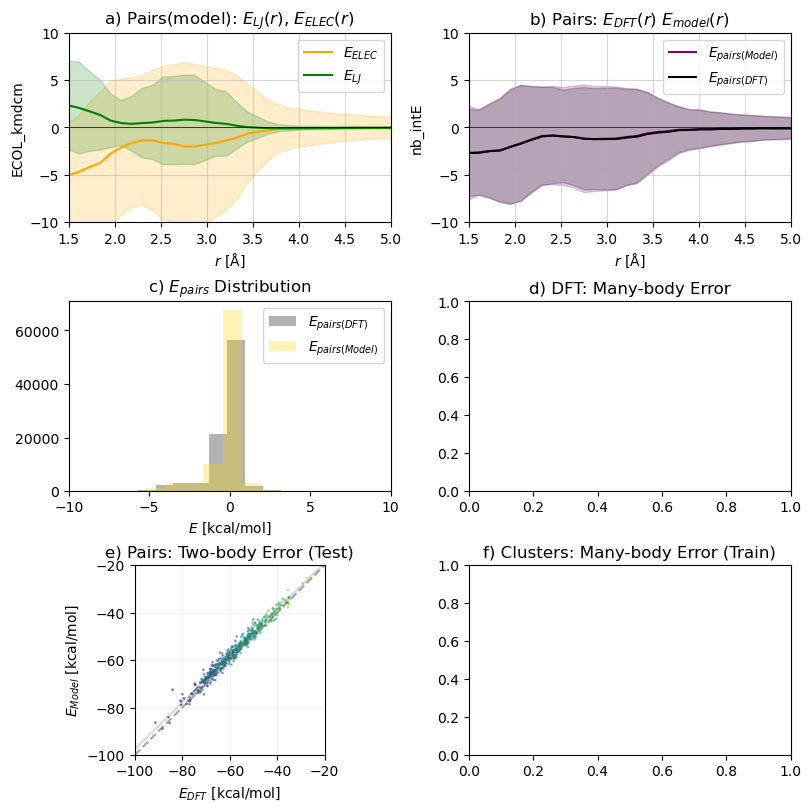

In [119]:
ff_fit_mdcm = next(read_from_pickle('pickles/pbe0_dz_kmdcm_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))

ff.func = ff_fit_mdcm.func
ff.elec = "ECOL_kmdcm"
print(ff_fit_mdcm.elec, ff.elec, ff_fit_mdcm.func, ff.func)

ff.fit_func(ff_fit_mdcm.opt_results[0]["x"], maxfev=1000)
print(ff_fit_mdcm.elec, ff.elec, ff_fit_mdcm.func, ff.func)

plot_data_pairs_fit(ff, ff_fit_mdcm, ERRORCUT=1, ecol="ECOL_kmdcm")

#  PC

In [82]:
ff_fit_mdcm = next(read_from_pickle('pickles/pbe0_dz_PC_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'))
ff = next(read_from_pickle('pickles/ff_pc_pairs.pkl'))
ff.elec = "ECOL_PC"
ff.func = ff_fit_mdcm.func
ff.fit_func(ff_fit_mdcm.opt_results[0]["x"], maxfev=1000)
print(ff_fit_mdcm.elec, ff.elec)

plot_data_pairs_fit(ff, ff_fit_mdcm, ERRORCUT=1, ecol="ECOL_PC")

FileNotFoundError: [Errno 2] No such file or directory: 'pickles/pbe0_dz_PC_LJ_water_cluster_ELEC_harmonic_ELEC.pkl'

In [306]:
# pc_hf_dz.plot_pair_monomer_E()

In [4]:
pc_pbe0_dz_d4.data.describe()

,ECOL,TOTAL,ELEC,VDW,M_ENERGY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
count,500.000000,500.000000,500.000000,500.000000,499.000000,500.0,500.000000,500.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-133.827185,22.381426,-67.859102,16.144373,-1527.149512,20.0,-1527.266244,189.504000,-73.220723,-71.277730,-958290.896097,-958291.987715,-958364.150064,-51.714729,-51.714729
std,24.856582,2.211815,12.957433,5.942390,0.008766,0.0,0.024025,1.279554,14.005057,11.538206,5.495837,5.788407,15.075471,9.496744,9.496744
min,-200.733503,15.659680,-103.426560,-0.473550,-1527.172550,20.0,-1527.355451,180.000000,-119.139401,-107.906274,-958305.356511,-958306.586371,-958420.127876,-79.200120,-79.200120
25%,-151.116341,20.823118,-76.683603,11.621738,-1527.155411,20.0,-1527.281645,190.000000,-82.356226,-79.371719,-958294.596253,-958295.944454,-958373.813919,-58.174290,-58.174290
50%,-133.880791,22.313955,-68.597010,15.881015,-1527.149938,20.0,-1527.267910,190.000000,-74.021816,-71.755623,-958291.137679,-958292.493834,-958365.195605,-51.969300,-51.969300
75%,-117.043617,23.953010,-59.230308,20.017783,-1527.143855,20.0,-1527.249622,190.000000,-63.784764,-63.730310,-958287.353378,-958288.264050,-958353.719814,-45.561567,-45.561567
max,-59.273033,28.093770,-27.200860,35.037000,-1527.121068,20.0,-1527.204174,190.000000,-34.641033,-36.754984,-958273.051609,-958272.274081,-958325.200490,-22.766810,-22.766810


In [5]:
pc_pbe0_dz.data.describe()

,ECOL,TOTAL,ELEC,VDW,M_ENERGY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-133.827185,22.381426,-67.859102,16.144373,-1527.146302,20.0,-1527.242271,189.504000,-60.220800,-57.976652,-958288.886029,-958289.978786,-958349.106829,-51.714729,-51.714729
std,24.856582,2.211815,12.957433,5.942390,0.008767,0.0,0.022827,1.279554,13.224149,10.628936,5.501566,5.794098,14.324272,9.496744,9.496744
min,-200.733503,15.659680,-103.426560,-0.473550,-1527.169378,20.0,-1527.325938,180.000000,-102.618427,-91.338505,-958303.366021,-958304.589708,-958401.608110,-79.200120,-79.200120
25%,-151.116341,20.823118,-76.683603,11.621738,-1527.152207,20.0,-1527.257165,190.000000,-68.747177,-65.724057,-958292.591169,-958293.939627,-958358.452723,-58.174290,-58.174290
50%,-133.880791,22.313955,-68.597010,15.881015,-1527.146693,20.0,-1527.242883,190.000000,-60.845386,-58.342427,-958289.131411,-958290.487174,-958349.490830,-51.969300,-51.969300
75%,-117.043617,23.953010,-59.230308,20.017783,-1527.140654,20.0,-1527.226421,190.000000,-51.066453,-50.426095,-958285.341969,-958286.255076,-958339.160783,-45.561567,-45.561567
max,-59.273033,28.093770,-27.200860,35.037000,-1527.117848,20.0,-1527.184906,190.000000,-25.015840,-27.178186,-958271.031149,-958270.254739,-958313.110340,-22.766810,-22.766810


In [6]:
pc_hf_dz.data.describe()

,M_ENERGY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
count,500.000000,500.0,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-1520.733466,20.0,-1520.779124,190.0,-28.650990,-22.788556,-954264.811910,-954265.105354,-954293.462900
std,0.013915,0.0,0.023388,0.0,11.645006,9.271737,8.731658,8.826096,14.676203
min,-1520.773955,20.0,-1520.852882,190.0,-61.010968,-46.568714,-954290.219022,-954290.203742,-954339.746277
25%,-1520.742690,20.0,-1520.794304,190.0,-36.431257,-29.186478,-954270.600506,-954271.161047,-954302.988317
50%,-1520.733949,20.0,-1520.780017,190.0,-29.411238,-23.271446,-954265.114980,-954265.486506,-954294.022829
75%,-1520.724297,20.0,-1520.764562,190.0,-20.547045,-16.499341,-954259.058641,-954259.476201,-954284.324905
max,-1520.692966,20.0,-1520.710157,190.0,1.146366,2.099289,-954239.398363,-954239.923506,-954250.185792


In [7]:
pc_pbe0tz.data.describe()

,M_ENERGY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
count,500.000000,500.0,206.000000,500.000000,206.000000,500.000000,500.000000,500.000000,206.000000
mean,-1527.542847,20.0,-1527.628928,189.992000,-54.001603,-52.914172,-958537.718926,-958538.780969,-958591.735105
std,0.009291,0.0,0.022446,0.089173,12.927322,10.295779,5.830229,6.119043,14.085155
min,-1527.568004,20.0,-1527.687217,189.000000,-87.078849,-84.578786,-958553.505183,-958554.759604,-958628.311673
25%,-1527.549226,20.0,-1527.645370,190.000000,-63.112627,-60.432964,-958541.722184,-958542.928948,-958602.052817
50%,-1527.543363,20.0,-1527.630506,190.000000,-54.894201,-53.347405,-958538.042853,-958539.208350,-958592.725416
75%,-1527.536950,20.0,-1527.613400,190.000000,-45.373063,-45.761901,-958534.018563,-958534.804928,-958581.991576
max,-1527.513277,20.0,-1527.575416,190.000000,-21.177743,-22.985821,-958519.164039,-958518.514585,-958558.156266


In [8]:
dataframes = [pc_pbe0_dz_d4.data, 
              pc_pbe0_dz.data, 
              pc_hf_dz.data, 
              pc_pbe0tz.data]

columns = ["PBE0/DZ", "PBE0/DZ+D4", "HF/DZ", "PBE0/TZ"]

# Combine the dataframes for each key (column) separately
keys = ['M_ENERGY', 'n_monomers', 'C_ENERGY', 'n_pairs', 'intE', 'P_intE', 'm_E_tot', 'p_m_E_tot', 'C_ENERGY_kcalmol']

combined_dataframes = {}
data_blocks = {}
for key in keys:
    combined_df = pd.concat([df[[key]] for df in dataframes], axis=1)
    combined_dataframes[key] = combined_df
    combined_dataframes[key].columns = columns
    data_blocks[key] = combined_dataframes[key].copy()
    _ = []
    categ = []
    indexes = []
    for cat in columns:
        _.extend(list(combined_dataframes[key][cat]))
        categ.extend([cat]*len(combined_dataframes[key][cat]))
        indexes.extend(combined_dataframes[key][cat].index)
    combined_dataframes[key] = pd.DataFrame({key: _, "theory": categ}, index=indexes)
    

In [9]:
'M_ENERGY', 'n_monomers', 'C_ENERGY', 'n_pairs', 'intE', 'P_intE', 'm_E_tot', 'p_m_E_tot', 'C_ENERGY_kcalmol'

('M_ENERGY',
 'n_monomers',
 'C_ENERGY',
 'n_pairs',
 'intE',
 'P_intE',
 'm_E_tot',
 'p_m_E_tot',
 'C_ENERGY_kcalmol')

In [141]:
key = "intE"
key = "P_intE"
key = "M_ENERGY"
key = "C_ENERGY"
# key = "C_ENERGY_kcalmol"
df = combined_dataframes[key]
df["key"] = df.index
df = df.reset_index()
df.dropna()
data = data_blocks[key]

In [150]:
data = data.dropna()
df = df.dropna()
if key == "M_ENERGY" or key == "C_ENERGY":
    data = data * 627.2
    data = data - data.mean()
    for c in columns:
        df[df["theory"] == c][key] = (df[df["theory"] == c][key] * 627.2).copy()
        df[df["theory"] == c][key] = (df[df["theory"] == c][key] - df[df["theory"] == c][key].mean()).copy()

/tmp/ipykernel_118529/744396583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["theory"] == c][key] = (df[df["theory"] == c][key] * 627.2).copy()
/tmp/ipykernel_118529/744396583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["theory"] == c][key] = (df[df["theory"] == c][key] - df[df["theory"] == c][key].mean()).copy()


In [151]:
# pc = sp.posthoc_conover(df, val_col=key, group_col='theory', 
#                    p_adjust = 'holm')
# pc

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f4c36d160d0>)

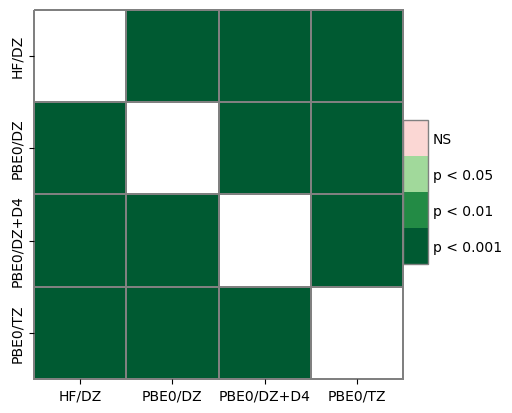

In [152]:
# pc = sp.posthoc_conover(x, val_col='values', group_col='groups')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

In [153]:
palette = ["blue", "skyblue", "green", "darkblue"]

Text(0.5, 1.0, 'C_ENERGY')

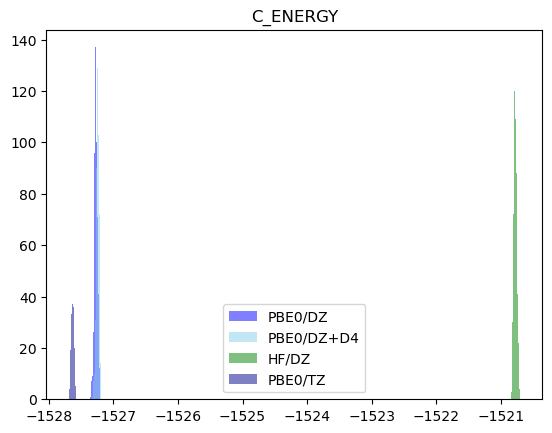

In [154]:
for i, c in enumerate(columns):
    plt.hist(df[df["theory"] == c][key], 
             label=c, alpha=0.5, color=palette[i])

plt.legend()
plt.title(key)

In [155]:
df

,index,C_ENERGY,theory,key
0,test467,-1527.260977,PBE0/DZ,test467
1,test263,-1527.286187,PBE0/DZ,test263
2,test35,-1527.281757,PBE0/DZ,test35
3,test223,-1527.225180,PBE0/DZ,test223
4,test254,-1527.262467,PBE0/DZ,test254
...,...,...,...,...
1989,test46,-1527.614909,PBE0/TZ,test46
1994,test489,-1527.657437,PBE0/TZ,test489
1995,test100,-1527.599499,PBE0/TZ,test100
1998,test185,-1527.622125,PBE0/TZ,test185


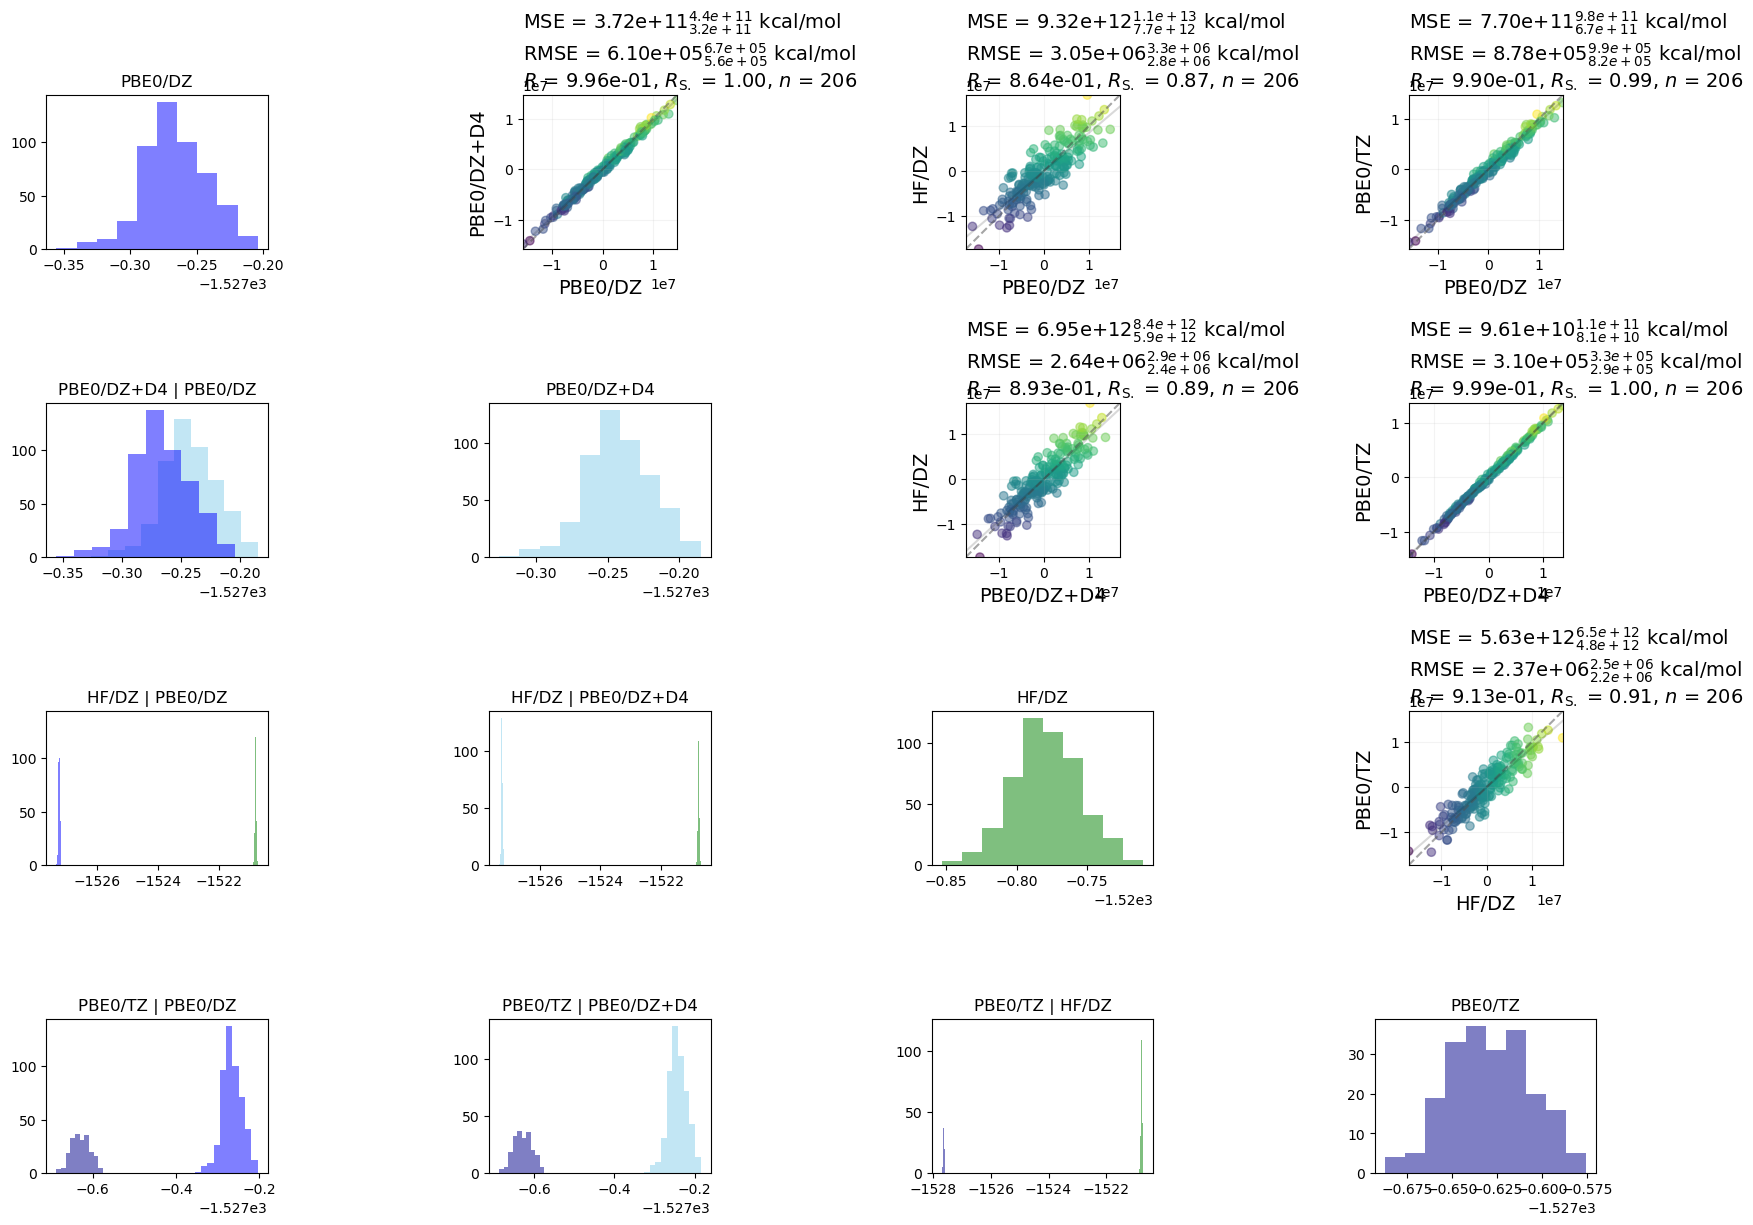

In [156]:
fig, ax = plt.subplots(4,4, figsize=(20,14))
plt.subplots_adjust(hspace=1,wspace=1)

    
for i, K1 in enumerate(columns):
    for j, K2 in enumerate(columns):
        if i < j:
            plot_energy_MSE(data, 
                            K1, 
                            K2, 
                            elec="HF/DZ",
                            xlabel=K1,
                            ylabel=K2,
                            ax=ax[i,j]
                           )
        if i == j:
            c = columns[i]
            ax[i,j].hist(df[df["theory"] == c][key], 
                         label=c, alpha=0.5, color=palette[i])
            ax[i,j].set_title(c)
        if i > j:
            c = columns[i]
            ax[i,j].set_title(f"{columns[i]} | {columns[j]}")
            ax[i,j].hist(df[df["theory"] == c][key], 
                         label=c, alpha=0.5,color=palette[i])
            c = columns[j]
            ax[i,j].hist(df[df["theory"] == c][key], 
                         label=c, alpha=0.5,color=palette[j])
            
plt.savefig(key+"comp.pdf", bbox_inches="tight")

In [128]:
data - data.mean()

,PBE0/DZ,PBE0/DZ+D4,HF/DZ,PBE0/TZ
test467,-4.950424,-4.957948,-10.075249,-5.573193
test263,-6.078129,-6.086130,-12.183852,-6.760601
test35,1.982595,1.978151,-0.008520,1.661528
test223,-0.783683,-0.780507,1.221952,-0.491838
test254,6.725375,6.738617,14.701684,7.779199
...,...,...,...,...
test100,3.097769,3.098543,2.857169,3.066933
test304,-2.927509,-2.930724,-5.762390,-3.237569
test327,-4.868047,-4.874285,-8.026814,-5.287635
test185,0.820205,0.823262,3.721300,1.132968
